# Classification

## import required libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as data_split

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import BaggingClassifier as BG
from sklearn.ensemble import RandomForestClassifier as RDF



## Variable initialisation

In [2]:
def classification(csv_file, rounds=100, remove_disperse=[]):
	df = pd.read_csv(csv_file)
	
	#X = df["Amplitude"].astype(complex).astype(float)#.reshape(1, -1)
	#X = [[i, x] for i, x in enumerate(X)]
	#X = df[["Amplitude"]].astype(complex).astype(float)#.reshape(1, -1)
	#X = df.drop(["class"], axis=1)
	
	X = df[["(5, 1)", "(5, 3)"]]
	y = df["class"]
	result = {key: {"score" : []} for key, value in classifiers.items()}
	
	print("start Classifying...")
	
	for i in range(rounds):
		X_train, X_test, y_train, y_test = data_split(X, y, test_size=0.3)
		
		for name, classifier in classifiers.items():
			#scaler = StandardScaler()
			#scaler.fit(X_train)
			#X_train = scaler.transform(X_train)
			#X_test = scaler.transform(X_test)
			
			classifier.fit(X_train, y_train)
			score = classifier.score(X_test, y_test)
			
			result[name]["score"].append(score)
		
	print("finish Classification!")
	
	return result, X_train, y_train, X_test, y_test, classifier

In [3]:
def performances(result, title="performances"):
	
	print("performances: {}".format(title))
	print("-"*50)
	print("CLASSIF\t\tMEAN\tMEDIAN\tMINV\tMAXV\tSTD")
	print("-"*50)
	
	for n in result:
    		
		m = round(np.mean(result[n]["score"])*100, 2)
		med = round(np.median(result[n]["score"])*100, 2)
		minv = round(np.min(result[n]["score"])*100, 2)
		maxv = round(np.max(result[n]["score"])*100, 2)
		std = round(np.std(result[n]["score"])*100, 2)
		
		print("{:<16}{}\t{}\t{}\t{}\t{}".format(n, m, med, minv, maxv, std))
	
	print("-"*50)
	print()

## Main()

start Classifying...
finish Classification!
performances: performances
--------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
--------------------------------------------------
Decision Tree   93.02	93.01	91.83	93.9	0.35
Bagging         93.4	93.43	92.38	94.1	0.3
Random Forest   93.72	93.7	93.03	94.46	0.3
--------------------------------------------------



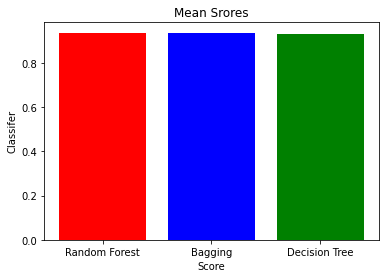

In [4]:
csv_file ="archive/shapes/Zernik_dataset_ordre20.csv"

classifiers = {
	"Decision Tree" : DT(),
	"Bagging"       : BG(),
	"Random Forest" : RDF()
	}

result, x_test, y_test, X_train, y_train, classifier = classification(csv_file)
performances(result)

# Make a random dataset:
height = [np.mean(result['Random Forest']['score']), np.mean(result['Bagging']['score']), np.mean(result['Decision Tree']['score'])]

bars = ('Random Forest', 'Bagging','Decision Tree')
y_pos = np.arange(len(bars))
# generate random colors
color = (np.random.random(), np.random.random(), np.random.random())
# Create bars
plt.bar(y_pos, height,  color = ['r', 'b', 'g'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xlabel('Score') 
plt.ylabel('Classifer') 
  
# displaying the title
plt.title("Mean Srores")

# Show graphic
plt.show()

# ROC Curve multiclass for Random Forest

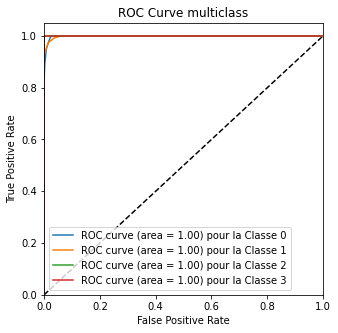

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize):
    y_score = clf.predict_proba(X_test)
    classes=[]
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    classes= ["circle", "square", "star", "triangle"]

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve multiclass')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label="ROC curve (area = %0.2f) pour la Classe %i"  % (roc_auc[i], i))
    ax.legend(loc="best")
    #ax.grid(alpha=.4)
    #sns.despine()
    plt.show()


plot_multiclass_roc(classifier, x_test, y_test, n_classes=4, figsize=(5, 5))